# Import

In [1]:
### 기본
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

### tuning
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings

### model 
import lightgbm as lgb

### os
from tqdm import tqdm
import gc
import random
import re

warnings.filterwarnings(action='ignore')

In [2]:
# -*- coding: utf-8 -*- 

# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

'''import tensorflow as tf
from tensorflow import keras
import keras.backend as K'''

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
import time

# Data load

In [3]:
train_x = np.array(pd.read_csv('train_x_d.csv').fillna(0).drop(['user_id'],axis=1))
test_x = np.array(pd.read_csv('test_x_d.csv').fillna(0).drop(['user_id'],axis=1))
train_y = np.array(pd.read_csv('train_y.csv').drop(['user_id'],axis=1).ploblem)

In [5]:
pd.DataFrame(train_x)

,0,1,2,3,4,5,6,7,8,9,...,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697
0,1.0,1.0,14.0,3.0,285.0,0.0,11.0,9.0,18.0,5.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,1.0,2.0,26.0,12.0,2201.0,0.0,11.0,50.0,29.0,48.0,...,0.482376,1.093927,0.0,0.223297,0.223297,0.000000,0.0,2.394592,1.427859,0.223297
2,1.0,1.0,16.0,4.0,284.0,0.0,10.0,13.0,13.0,15.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,1.0,2.0,18.0,13.0,244.0,0.0,9.0,14.0,10.0,5.0,...,0.471405,0.000000,0.0,0.212959,0.212959,0.212959,0.0,0.722179,0.212959,0.000000
4,1.0,2.0,18.0,12.0,693.0,0.0,25.0,21.0,49.0,28.0,...,0.574108,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.542586,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.0,1.0,17.0,10.0,152.0,0.0,0.0,0.0,0.0,0.0,...,0.497930,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.113404,1.493789,0.481046
14996,1.0,1.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
14997,1.0,2.0,21.0,13.0,741.0,0.0,9.0,34.0,34.0,64.0,...,0.751729,3.796047,0.0,0.000000,0.000000,0.000000,0.0,3.162278,0.000000,0.000000
14998,1.0,2.0,14.0,8.0,113.0,0.0,7.0,0.0,10.0,0.0,...,0.566947,2.226922,0.0,0.185577,0.185577,0.000000,0.0,0.618590,0.000000,0.000000


In [3]:
#train_x = np.array((pd.read_csv('train_x.csv')).drop(['user_id'],axis=1))
#test_x = np.array((pd.read_csv('test_x.csv')).drop(['user_id'],axis=1))
#train_y = np.array(pd.read_csv('train_y.csv').drop(['user_id'],axis=1).ploblem)
#test_id = pd.read_csv('test_x.csv')#.user_id

In [4]:
# 학습데이터 70%, 평가데이터 30%로 데이터 분할
X_train, X_dev, y_train, y_dev = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

In [9]:
clfs = [
    #(
     #   SVC(random_state=0, probability=True),
      #  {'kernel': ['linear','rbf'],
       #  'C' : [0.001, 0.01, 0.1, 1, 10, 100],
        # 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
        #}
    #),
    (
        CatBoostClassifier(random_state=0, verbose=False),
        {'n_estimators': range(10, 310, 10),
         'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
         'random_strength': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],
         'l2_leaf_reg': [1,2,3,4,5,6,7,8,9,10,20,30,50,100,200]}
    ),
    (
        LGBMClassifier(random_state=0),
        {'num_iteration': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],
         'max_depth':[3,4,6,8,10],
         'min_data_in_leaf':[5,10,50,70,100],
         'num_leaves':[15,31,35],
         'boosting':['gbdt','rf'],
         'n_estimators': range(10, 200, 10),
         'min_split_gain': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
         #'reg_alpha': [0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
         'reg_lambda': [0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
         'feature_fraction': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
         #'bagging_fraction': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
         'bagging_freq': [1, 2, 3, 4, 5, 6, 7],
         'min_child_samples': range(5,50,5),
         'boost_from_average' : [False]
         }
    ),
    (
        XGBClassifier(random_state=0),
        {'learning_rate': [1, 0.1, 0.01],
         'n_estimators': [100, 200, 300],
         'max_depth':[3,4,6,8,10],
         'subsample':[0.3, 0.5, 0.7, 1],
         'min_child_weight':[10,20,50,100],
         'objective':['binary:logistic'],
         'eval_metric':['error'],
         'min_split_loss':[10,20,50,100],
         'colsample_bytree': [0.5, 0.7, 0.9, 1],
         'reg_alpha': [0.0001,0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
         'reg_lambda': [0.0001,0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
         'scale_pos_weight': np.arange(0.0, 50.1, 0.1),
         'boost_from_average' : [False]
        }
    ),
    (
        KNeighborsClassifier(),              # 사용하려는 모델
        {'n_neighbors': [3,5,7,9,11],        # 최적화하려는 하이퍼파라미터
         'weights': ['uniform','distance'],
         'algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
         'leaf_size': [10, 20, 30, 40],
         'p': [1,2],
         'metric': ['minkowski', 'euclidean', 'manhattan']}
    ),
    (
        MLPClassifier(random_state=0),
        {'batch_size': ['auto', 32, 64, 128],
         'learning_rate' : ['constant', 'adaptive','invscaling'],
         'activation': ['tanh', 'relu'],
         'solver': ['sgd', 'adam'],
         'hidden_layer_sizes': [10,30,50,100],
         'alpha': [1e-07,1e-06,0.0001,0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,0.9]}
    ),
    (
        LogisticRegression(random_state=0),  
        {'C': np.arange(0.1, 1.1, 0.1),      
         'penalty': ['l1','l2'],
         'max_iter' : [100, 300, 500, 1000]}
    ),
    (
        RandomForestClassifier(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [None,3,4,5,6],
         'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int),
         'criterion': ['gini','entropy'],
         'min_samples_split':[2,3,4],
         'min_samples_leaf':[1,2,4],
         'min_impurity_decrease': [0,0.0001,0.001,0.01,0.0002,0.002,0.02,0.0005,0.005,0.05,0.1,0.2,0.3,0.4,0.5],
         'bootstrap': [True, False],
         'class_weight': ['balanced', 'balanced_subsample', {}]}
    ),
    (
        GradientBoostingClassifier(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],
         'criterion': ['friedman_mse', 'mse', 'mae'],
         'loss': ['deviance', 'exponential'],
         'min_samples_split': [2, 4, 5, 7, 9, 10],
         'min_samples_leaf': [1, 2, 3, 4, 5],
         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
         'min_impurity_decrease': [0,0.0001,0.001,0.01,0.0002,0.002,0.02,0.0005,0.005,0.05,0.1,0.2,0.3,0.4,0.5],
         'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)
        }
    ),
    (
        DecisionTreeClassifier(random_state=0),
        {'criterion' :['gini','entropy'],
         'max_depth':[3,4,6,8,10],
         'min_samples_leaf':[3,5,10,50,100],
         'splitter':["best","random"]
        }
    ),
]

clfs_tuned = []  # 튜닝된 모델을 저장
start_time = time.time()
for clf, param_grid in tqdm(clfs):
    start = time.time()
    rand_search = RandomizedSearchCV(clf, param_grid, n_iter=8, scoring='roc_auc', 
                                     cv=3, random_state=0, n_jobs=6)
    rand_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    clf_score = rand_search.score(X_dev, y_dev)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    print('final params', rand_search.best_params_)
    clfs_tuned.append((clf_name, rand_search, clf_score))
    globals()['{}_pred'.format(clf_name)] = pd.DataFrame(rand_search.best_estimator_.predict_proba(test_x))
print('모델 수행 시간: {0:.1f} 초'.format(time.time()- start_time))

 11%|████████▉                                                                       | 1/9 [45:07<6:01:02, 2707.79s/it]

CatBoostClassifier                                   0.847352 2707.7
final params {'random_strength': 0.7, 'n_estimators': 250, 'l2_leaf_reg': 8, 'depth': 11}
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=45 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=300, num_iteration=300 will be ignored. Current value: num_iterations=300
LGBMClassifier                                       0.844695 25.1
final params {'reg_lambda': 2, 'num_leaves': 15, 'num_iteration': 300, 'n_estimators': 140, 'min_split_gain': 0.8, 'min_data_in_leaf': 10, 'min_child_samples': 45, 'max_depth': 10, 'learning_rate


 22%|█████████████████▊                                                              | 2/9 [45:35<3:42:05, 1903.69s/it]

[00:46:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boost_from_average, subsamle } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBClassifier                                        0.844089 1174.0
final params {'subsamle': 1, 'scale_pos_weight': 3.4000000000000004, 'reg_lambda': 0.005, 'reg_alpha': 0.001, 'objective': 'binary:logistic', 'n_estimators': 200, 'min_split_loss': 10, 'min_child_weight': 20, 'max_depth': 10, 'learning_rate': 0.01, 'eval_metric': 'error', 'colsample_bytree': 0.9, 'boost_from_average': False}



 33%|██████████████████████████                                                    | 3/9 [1:05:12<2:48:35, 1685.87s/it]

KNeighborsClassifier                                 0.701266 980.5
final params {'weights': 'distance', 'p': 2, 'n_neighbors': 11, 'metric': 'manhattan', 'leaf_size': 20, 'algorithm': 'ball_tree'}



 44%|██████████████████████████████████▋                                           | 4/9 [1:35:02<2:23:04, 1716.92s/it]

MLPClassifier                                        0.640650 2111.2
final params {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': 10, 'batch_size': 'auto', 'alpha': 0.0001, 'activation': 'relu'}


 67%|████████████████████████████████████████████████████                          | 6/9 [2:19:30<1:12:35, 1451.76s/it]

LogisticRegression                                   0.696162 556.7
final params {'penalty': 'l2', 'max_iter': 1000, 'C': 0.9}
RandomForestClassifier                               0.808261 2170.1
final params {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0002, 'max_features': 7758, 'max_depth': 4, 'criterion': 'gini', 'class_weight': {}, 'bootstrap': True}



 78%|██████████████████████████████████████████████████████████████▏                 | 7/9 [2:55:41<55:34, 1667.40s/it]

GradientBoostingClassifier                           0.847351 13188.2
final params {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.0005, 'max_features': 5818, 'max_depth': 10, 'loss': 'deviance', 'learning_rate': 0.01, 'criterion': 'friedman_mse'}



 89%|█████████████████████████████████████████████████████████████████████▎        | 8/9 [6:35:31<1:25:24, 5124.41s/it]

DecisionTreeClassifier                               0.797710 36.6
final params {'splitter': 'best', 'min_samples_leaf': 50, 'max_depth': 6, 'criterion': 'gini'}


100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [6:36:08<00:00, 2640.98s/it]

모델 수행 시간: 23768.9 초


In [ ]:
#submission = pd.DataFrame({'user_id':test_id,'problem':CatBoostClassifier_pred.iloc[:,1]});submission

In [ ]:
#t = pd.Timestamp.now()
#submission.to_csv(f'submission_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv',index=False,encoding='cp949')

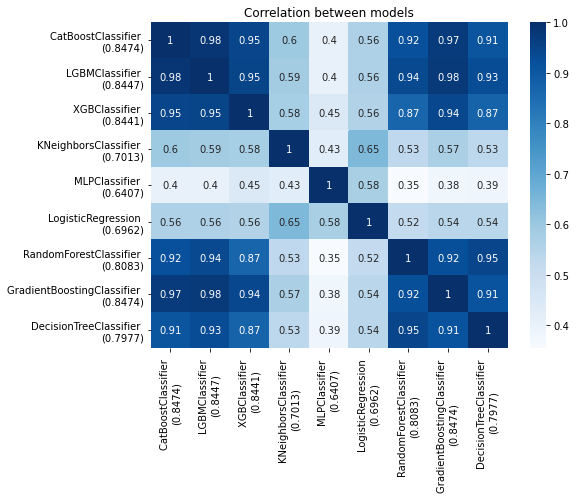

In [13]:
pred_results = []
for name, clf, clf_score in clfs_tuned:
    pred = clf.predict_proba(X_dev)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [14]:
# Mean agreement
(ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)

CatBoostClassifier \n(0.8474)            0.787387
LGBMClassifier \n(0.8447)                0.792156
XGBClassifier \n(0.8441)                 0.770553
KNeighborsClassifier \n(0.7013)          0.558720
MLPClassifier \n(0.6407)                 0.421885
LogisticRegression \n(0.6962)            0.563216
RandomForestClassifier \n(0.8083)        0.750252
GradientBoostingClassifier \n(0.8474)    0.777496
DecisionTreeClassifier \n(0.7977)        0.754040
dtype: float64

### averaging

In [23]:
# Averaging 앙상블에 사용하지 않을 모델은 주석 처리하시오.
selected = [
    'KNeighborsClassifier', 
    #'MLPClassifier',
    'LogisticRegression', 
    #'RandomForestClassifier', 
    'GradientBoostingClassifier', 
    #'DecisionTreeClassifier',
    'XGBClassifier', 
    'LGBMClassifier',
    'CatBoostClassifier' 
    #'ExtraTreesClassifier'
]
models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

In [24]:
# 아래 코드는 추후 estimator class("BlendingClassifier")로 만들 예정

max_score = 0
for p in tqdm([0]):  # p==1:산술평균, p=0:기하평균, 그 외:멱평균(주의:멱평균은 과적합 가능성이 높음)    
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_dev)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_dev)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_dev, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [2:08:34<00:00, 7714.48s/it]

p=0
CatBoostClassifier●GradientBoostingClassifier
0.8498460405036152


In [16]:
import pickle
import joblib

In [48]:
#joblib.dump(models,'model_avg(0)_25%.pkl')

['model_avg(0)_25%.pkl']

In [6]:
#models_for_ensemble = joblib.load('model_avg(0).pkl')

In [26]:
t = pd.Timestamp.now()
test_id = list(range(30000, 44999))

if p == 0:
    pred_mean = gmean([clf.predict_proba(test_x)[:,1] for name, clf, _ in models], axis=0)
else:
    preds = [clf.predict_proba(test_x)[:,1] for name, clf, _ in models]
    pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
pd.DataFrame({'user_id': test_id, 'problem': pred_mean}).to_csv(f'submission_avg_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv',index=False)

### stacking

In [27]:
# 2-layer stacking

# Initialize 1st level estimators
# 사용하지 않을 모델은 주석 처리하세요.
selected = [
    'KNeighborsClassifier', 
    #'MLPClassifier',
    #'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    #'DecisionTreeClassifier',
    'XGBClassifier',
    'LGBMClassifier',
    'CatBoostClassifier',  
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned if name in selected]
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), cv=3)

stk_clf.fit(X_train, y_train)
print(roc_auc_score(y_dev, stk_clf.predict_proba(X_dev)[:,1]))  

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=45 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=300, num_iteration=300 will be ignored. Current value: num_iterations=300
[20:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boost_from_average, subsamle } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[LightGBM] [War

In [54]:
t = pd.Timestamp.now()
test_id = list(range(30000, 44999))

if p == 0:
    pred_mean = gmean([clf.predict_proba(test_x)[:,1] for name, clf, _ in models], axis=0)
else:
    preds = [clf.predict_proba(test_x)[:,1] for name, clf, _ in models]
    pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
pd.DataFrame({'user_id': test_id, 'problem': pred_mean}).to_csv(f'submission_avg_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv',index=False)

# Apply the stacking model to Unseen Data
pd.DataFrame({'user_id': test_id, 'problem': stk_clf.predict_proba(test_x)[:,1]}).to_csv(f'submission_stk_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv', index=False)